In [1]:
import os

In [2]:
# move working dir up to parent, allows us to import from utils without too many shenanigans
os.chdir(os.pardir)

In [3]:
import matplotlib.pyplot as plt
import math

In [4]:
from utils.data_initial import *
from utils.data_generated import *
from utils.data_processing import *

## Movie Genres

### CMU dataset

In [5]:
df_movie_md = load_cmu_movie_metadata()

In [6]:
print("There are {} movies in our database.".format(len(df_movie_md)))

There are 81741 movies in our database.


In [7]:
genres = df_movie_md.genres.dropna()

In [8]:
print("Amongst those, {} have their genre specified.".format(len(genres)))

Amongst those, 81741 have their genre specified.


In [9]:
data = [item for sublist in genres for item in sublist]
all_genres = pd.DataFrame(data, columns=['genre'])

In [10]:
n_genres = len(all_genres.genre.unique())

print("There are {} different genres.".format(n_genres))

There are 363 different genres.


In [11]:
all_genres_vcount = pd.DataFrame(all_genres.value_counts())
all_genres_vcount.columns = ['occurences']

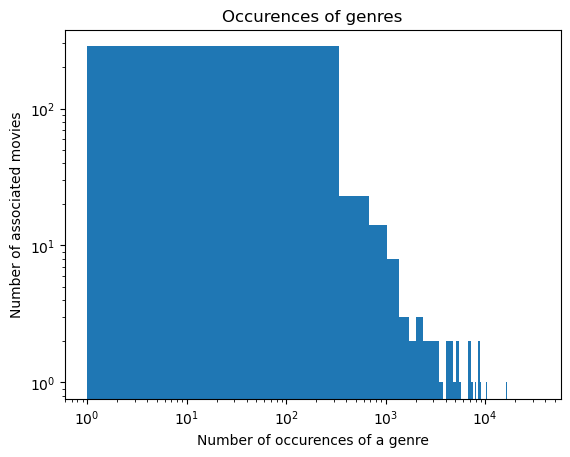

In [12]:
plt.hist(all_genres.value_counts(), bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Most genres occur less than 100 times in our dataset.

In [13]:
all_genres_vcount.describe()

,occurences
count,363.000000
mean,670.327824
std,2424.819001
min,1.000000
25%,13.000000
50%,65.000000
75%,283.500000
max,34007.000000


In [14]:
n_m10 = len(all_genres_vcount[all_genres_vcount.occurences > 10])
n_m100 = len(all_genres_vcount[all_genres_vcount.occurences > 100])
print("If we only keep those occuring more than 10 times we would have {} left, and for more than 100 times {} left.".format(n_m10, n_m100))

If we only keep those occuring more than 10 times we would have 276 left, and for more than 100 times 151 left.


Some genres occuring at most 10 times are:

In [15]:
all_genres_vcount[all_genres_vcount.occurences < 10].sample(10)

,occurences
genre,
Roadshow/Carny,5
Revisionist Fairy Tale,2
Legal drama,8
C-Movie,1
Nuclear warfare,3
Werewolf fiction,4
Finance & Investing,6
School story,5
Movies About Gladiators,6


The 15 most occuring genres are:

In [16]:
all_genres_vcount.head(15)

,occurences
genre,
Drama,34007
Comedy,16349
Romance Film,10234
Black-and-white,9094
Action,8798
Thriller,8744
Short Film,8141
World cinema,7155
Crime Fiction,6948


### Through time

In [17]:
genres_by_year = df_movie_md[['release_date', 'genres']]

In [18]:
genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
genres_by_year = genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.release_date.value_counts().sort_index())

C:\Users\jonas\AppData\Local\Temp\ipykernel_13884\3084723802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)


In [19]:
top_genres = [g[0] for g in list(all_genres_vcount.iloc[:5].index)]

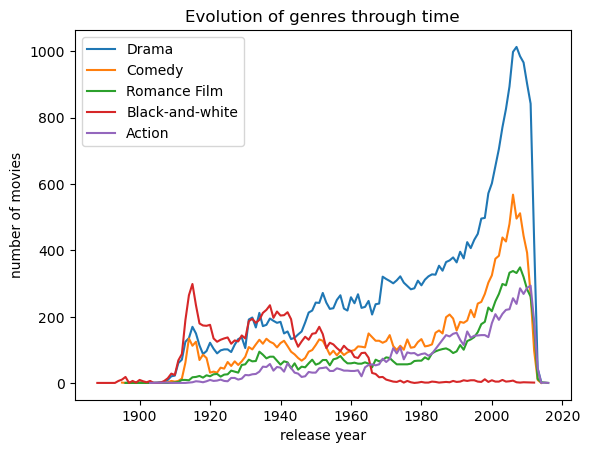

In [20]:
for genre in top_genres:
    genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

As we can see above, even in a basic plot we can see a clear difference in distribution of genre releases.

We try to normalize by the number of releases in each year.

In [21]:
releases_per_year = df_movie_md.release_date.apply(lambda d: d.year).value_counts()

In [22]:
genres_by_year_normalized = genres_by_year.copy()
genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
genres_by_year_normalized = genres_by_year_normalized.divide(releases_per_year, level=1)

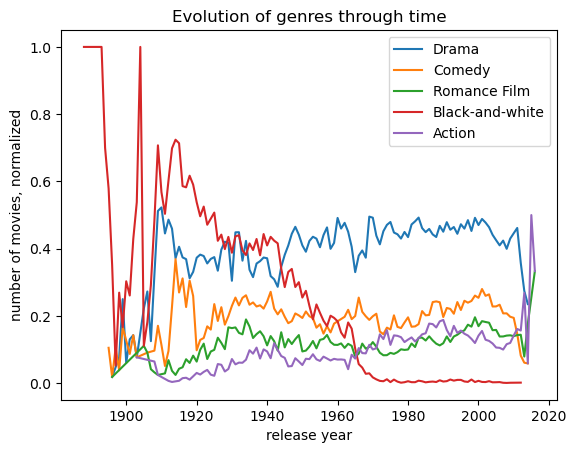

In [23]:
for genre in top_genres:
    genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

### We now consider the imdb dataset

In [24]:
df_imdb = load_imdb_title_basics()

In [25]:
print("There are {} unique movies etc in our database.".format(len(df_imdb.title_id.unique())))

There are 9365430 unique movies etc in our database.


In [26]:
df_imdb = df_imdb[df_imdb.type == 'movie']

In [27]:
print("{} amongst them are classified as movies...".format(len(df_imdb.title_id.unique())))

626893 amongst them are classified as movies...


In [28]:
df_imdb = df_imdb[df_imdb.genres.notnull()]

In [29]:
print("... and {} amongst them have their genres specified.".format(len(df_imdb.title_id.unique())))

... and 554884 amongst them have their genres specified.


In [30]:
data = [item for sublist in df_imdb.genres for item in sublist]
imdb_all_genres = pd.DataFrame(data, columns=['genre'])

print("The imdb movies dataset contains {} different genres.".format(len(imdb_all_genres.genre.unique())))

The imdb movies dataset contains 28 different genres.


We see that the imdb dataset has a fraction of the genres of the cmu dataset.

In [31]:
imdb_genres_vcount = pd.DataFrame(imdb_all_genres.value_counts())
imdb_genres_vcount.columns = ['occurences']

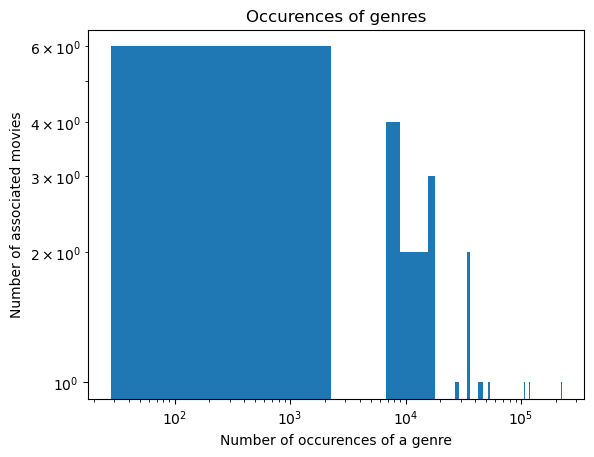

In [32]:
plt.hist(imdb_genres_vcount, bins=100)
plt.xscale('log')
plt.yscale('log')
plt.title("Occurences of genres")
plt.xlabel('Number of occurences of a genre')
plt.ylabel('Number of associated movies')
plt.show()

Due to the small amount of different genres, they all occur very often.

In [33]:
imdb_genres_vcount.describe()

,occurences
count,28.000000
mean,30275.071429
std,48015.220731
min,28.000000
25%,7783.000000
50%,13636.500000
75%,35517.500000
max,225480.000000


In [34]:
imdb_genres_vcount.head(15)

,occurences
genre,
Drama,225480
Documentary,117422
Comedy,106147
Action,52374
Romance,45983
Thriller,42939
Crime,35933
Horror,35379
Adventure,27360


### Through time

In [35]:
imdb_genres_by_year = df_imdb[['start_year', 'genres']]

In [36]:
imdb_genres_by_year = imdb_genres_by_year.explode('genres').groupby('genres').apply(lambda g: g.start_year.value_counts().sort_index())

In [37]:
top_genres = [g[0] for g in list(imdb_genres_vcount.iloc[:5].index)]

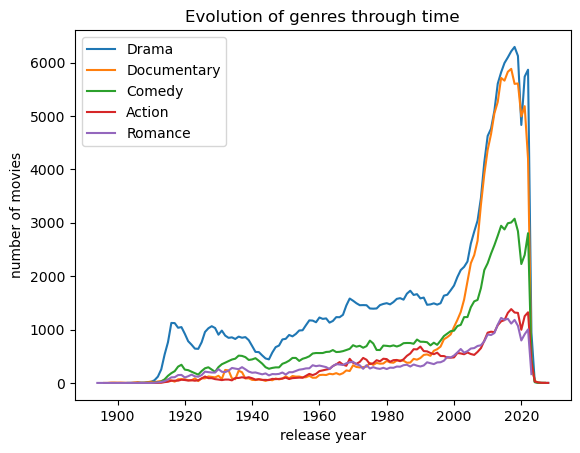

In [38]:
for genre in top_genres:
    imdb_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

There is a difference of evolution of genres visible, as for the cmu dataset.

We also try to normalize by the number of releases in each year.

In [39]:
releases_per_year = df_imdb.start_year.value_counts()

In [40]:
imdb_genres_by_year_normalized = imdb_genres_by_year.copy()
imdb_genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
imdb_genres_by_year_normalized = imdb_genres_by_year_normalized.divide(releases_per_year, level=1)

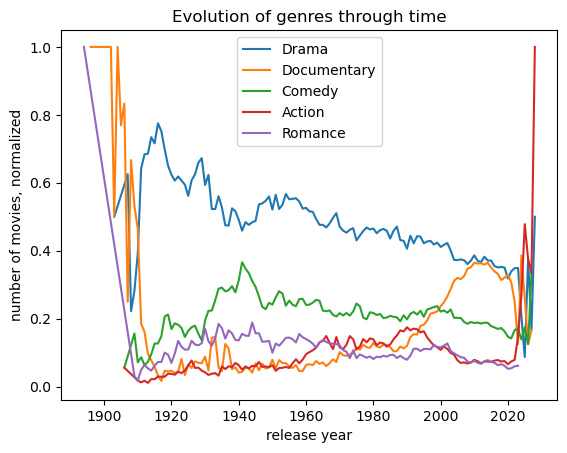

In [41]:
for genre in top_genres:
    imdb_genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

### Use combined data to be able to include other metrics

In [42]:
movie_data = load_movie_metadata(legacy=True)

In [43]:
data = [item for sublist in movie_data.genres_cmu for item in sublist]
genres = pd.DataFrame(data, columns=['genre'])

In [44]:
genres_vcount = pd.DataFrame(genres.value_counts())
genres_vcount.columns = ['occurences']

In [45]:
genres_vcount.describe()

,occurences
count,352.000000
mean,403.980114
std,1476.583613
min,1.000000
25%,9.000000
50%,47.000000
75%,170.000000
max,20881.000000


After combining cmu and imdb datasets we lost 11 genres and droped the other values.

In [46]:
genres_by_year = movie_data[['release_date', 'genres_cmu']]
genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)
genres_by_year = genres_by_year.explode('genres_cmu').groupby('genres_cmu').apply(lambda g: g.release_date.value_counts().sort_index())

C:\Users\jonas\AppData\Local\Temp\ipykernel_13884\2925293794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genres_by_year.release_date = genres_by_year.release_date.apply(lambda d: d.year)


In [47]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

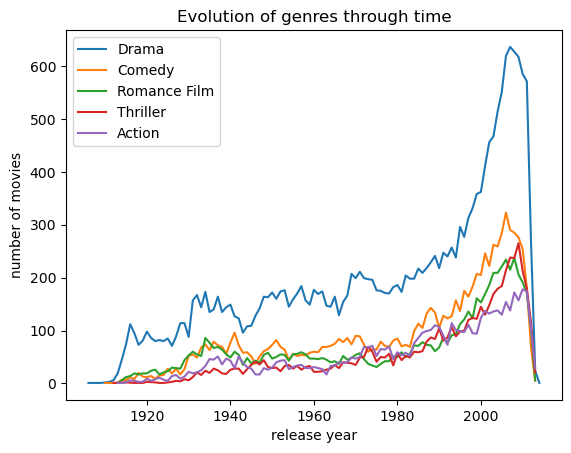

In [48]:
for genre in top_genres:
    genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies')
plt.legend()
plt.show()

We see that there are less Black-and-white movies in our combined data, this is probably due to the fact that they are older movies and data about them is hence not as good.

In [49]:
releases_per_year = movie_data.release_date.apply(lambda d: d.year).value_counts()

In [50]:
genres_by_year_normalized = genres_by_year.copy()
genres_by_year_normalized.index.set_names(['genre', 'year'], inplace=True)
genres_by_year_normalized = genres_by_year_normalized.divide(releases_per_year, level=1)

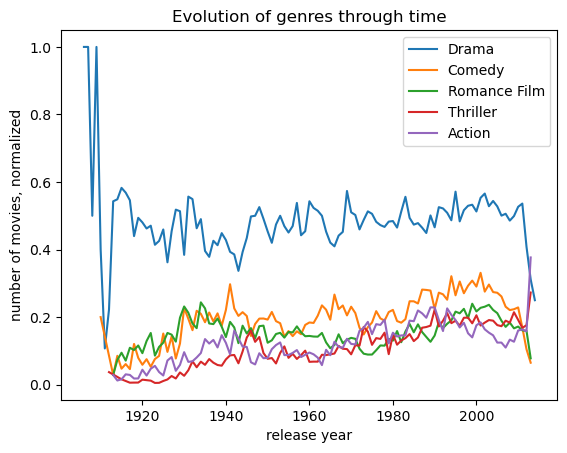

In [51]:
for genre in top_genres:
    genres_by_year_normalized[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

We drop all movies before 1915 and after 2011, because we are clearly missing some of them.

<AxesSubplot:>

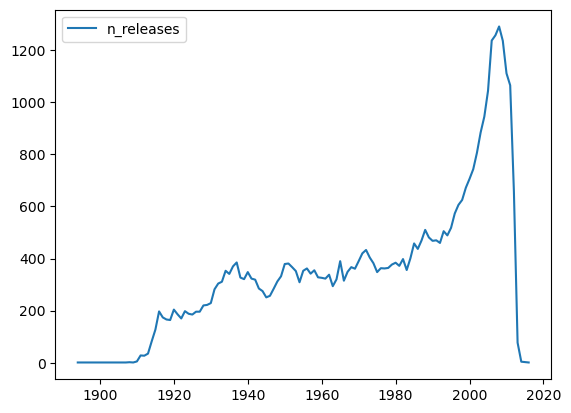

In [52]:
pd.DataFrame(releases_per_year).rename({'release_date': 'n_releases'}, axis='columns').sort_index(ascending=True).plot(label='n_releases')

In [53]:
pd.DataFrame(releases_per_year).sort_index(ascending=True).head(20)

,release_date
1894,1
1906,1
1907,1
1908,2
1909,1
1910,5
1911,28
1912,27
1913,35
1914,82


In [54]:
pd.DataFrame(releases_per_year).sort_index(ascending=False).head(20)

,release_date
2016,1
2014,4
2013,77
2012,659
2011,1065
2010,1111
2009,1236
2008,1291
2007,1257
2006,1237


In [55]:
genres_by_year_normalized_cut = genres_by_year_normalized[(genres_by_year_normalized.index.get_level_values(1) >= 1915) & (genres_by_year_normalized.index.get_level_values(1) <= 2011)]

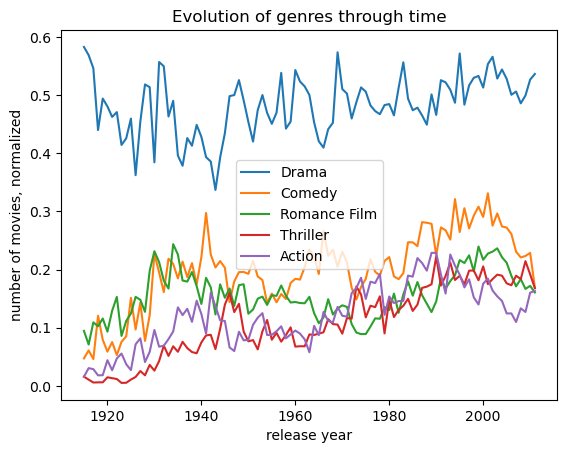

In [56]:
for genre in top_genres:
    genres_by_year_normalized_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's try taking into account popularity. To that end we use the number of votes on imdb

In [57]:
imdb_votes = load_imdb_title_rating()

In [58]:
movie_data_ext = movie_data.merge(imdb_votes, how='left', left_on='title_id_imdb', right_on='title_id')

In [59]:
# drop rows with missing votes
movie_data_ext = movie_data_ext.dropna(subset=['num_votes'])

In [60]:
movie_data_ext.release_date = movie_data_ext.release_date.apply(lambda d: d.year)

In [61]:
# drop years w/ bad data
movie_data_ext = movie_data_ext[movie_data_ext.release_date >= 1915]
movie_data_ext = movie_data_ext[movie_data_ext.release_date <= 2011]

In [62]:
# group by year, sorted by number of votes
movie_data_ext_by_year = movie_data_ext.sort_values(['num_votes'], ascending=False).groupby('release_date')

In [63]:
# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_ext_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

In [64]:
# build Dataframe with top 10 percent most popular movies per year
new_data = []
for idx, rows in movie_data_ext_by_year:
    n_votes_cutoff = rows.iloc[n_movies_per_year_10p[idx]].num_votes
    d = rows.drop(rows[rows.num_votes < n_votes_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

In [65]:
top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

In [66]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

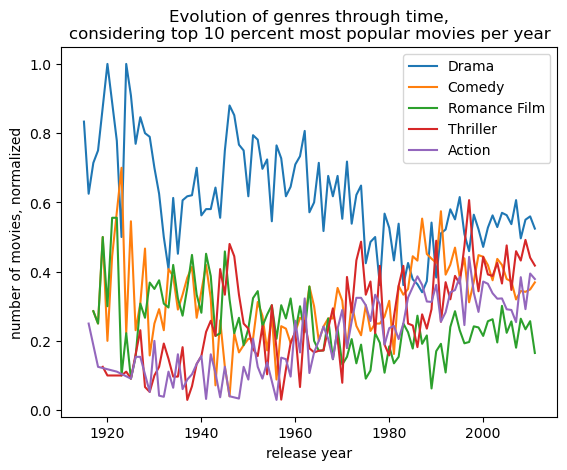

In [67]:
for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's narrow it down to more recent movies

In [68]:
top_movies_genres_by_year_cut = top_movies_genres_by_year[top_movies_genres_by_year.index.get_level_values(1) >= 1980]

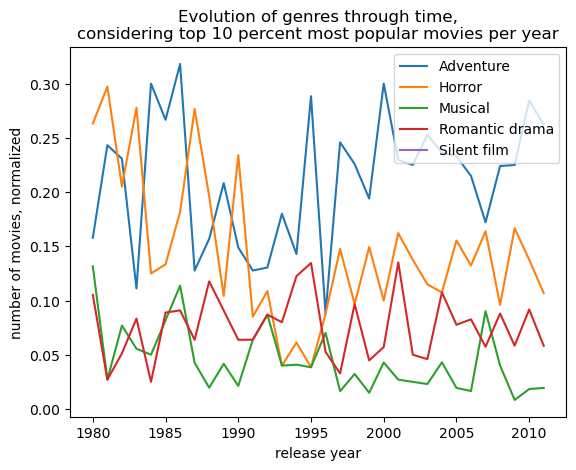

In [69]:
top_genres = [g[0] for g in list(genres_vcount.iloc[10:15].index)]

for genre in top_genres:
    top_movies_genres_by_year_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Let's now look into popularity based on rating instead of votes

In [70]:
movie_data_ext = movie_data.merge(imdb_votes, how='left', left_on='title_id_imdb', right_on='title_id')

# drop rows with missing rating
movie_data_ext = movie_data_ext.dropna(subset=['average_rating'])

movie_data_ext.release_date = movie_data_ext.release_date.apply(lambda d: d.year)

# drop years w/ bad data
movie_data_ext = movie_data_ext[movie_data_ext.release_date >= 1915]
movie_data_ext = movie_data_ext[movie_data_ext.release_date <= 2011]

# group by year, sorted by rating
movie_data_ext_by_year = movie_data_ext.sort_values(['average_rating'], ascending=False).groupby('release_date')

# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_ext_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

# build Dataframe with top 10 percent most popular movies per year
new_data = []
for idx, rows in movie_data_ext_by_year:
    rating_cutoff = rows.iloc[n_movies_per_year_10p[idx]].average_rating
    d = rows.drop(rows[rows.average_rating < rating_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

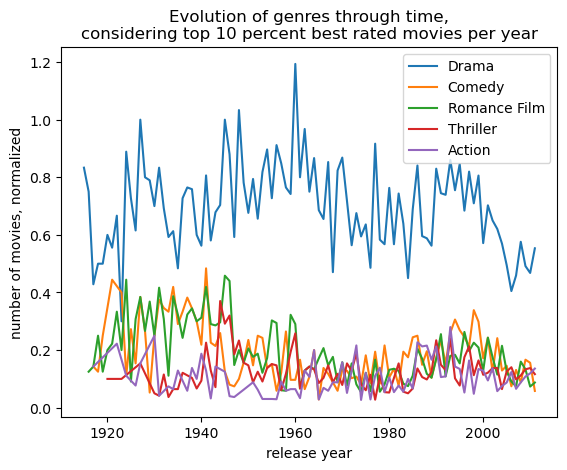

In [71]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent best rated movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Finally, look into box office revenue

In [72]:
# drop rows with missing revenue
movie_data_rev = movie_data.dropna(subset=['box_office_revenue'])

movie_data_rev.release_date = movie_data_rev.release_date.apply(lambda d: d.year)

# drop years w/ bad data
movie_data_rev = movie_data_rev[movie_data_rev.release_date >= 1915]
movie_data_rev = movie_data_rev[movie_data_rev.release_date <= 2011]

# group by year, sorted by revenue
movie_data_rev_by_year = movie_data_rev.sort_values(['box_office_revenue'], ascending=False).groupby('release_date')

# compute how many movies represents 10% of releases in each year
n_movies_per_year_10p = movie_data_rev_by_year.agg('count').movie_id_wikipedia.apply(lambda c: math.ceil(c/10))

# build Dataframe with top 10 percent most grossing movies per year
new_data = []
for idx, rows in movie_data_rev_by_year:
    revenue_cutoff = rows.iloc[n_movies_per_year_10p[idx]-1].box_office_revenue
    d = rows.drop(rows[rows.box_office_revenue < revenue_cutoff].index).genres_cmu
    new_data += [(idx, v) for v in d.values]

top_movies_genres_by_year = pd.DataFrame(new_data, columns=['year', 'genre']).explode('genre')
top_movies_genres_by_year = top_movies_genres_by_year.groupby('genre').apply(lambda g: g.year.value_counts()).sort_index()
top_movies_genres_by_year = top_movies_genres_by_year.divide(n_movies_per_year_10p, level=1)

C:\Users\jonas\AppData\Local\Temp\ipykernel_13884\1471386330.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data_rev.release_date = movie_data_rev.release_date.apply(lambda d: d.year)


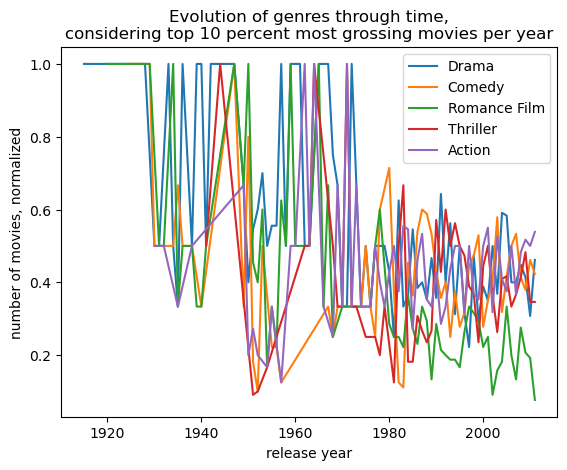

In [73]:
top_genres = [g[0] for g in list(genres_vcount.iloc[:5].index)]

for genre in top_genres:
    top_movies_genres_by_year[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most grossing movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

Narrow it down to more recent movies, because we are clearly missing revenue data before 1980.

In [74]:
top_movies_genres_by_year_cut = top_movies_genres_by_year[top_movies_genres_by_year.index.get_level_values(1) >= 1980]

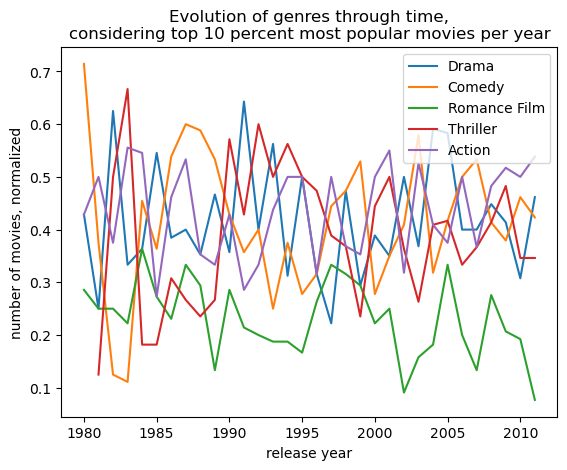

In [75]:
for genre in top_genres:
    top_movies_genres_by_year_cut[genre].plot(label=genre, kind='line')

plt.title('Evolution of genres through time,\nconsidering top 10 percent most popular movies per year')
plt.xlabel('release year')
plt.ylabel('number of movies, normalized')
plt.legend()
plt.show()

## Define the data we are going to consider

As we found out, there are multiple parameters we need to decide on:

1) which data set to use
2) which time span to consider
3) which genres to use
4) how to normalize the data
5) which movies to keep each year
6) granularity

We discuss these points below.

### 1. Data set

We will use the `movie_metadata` data set, which contains the CMU and the IMDB data combined. This allows us to consider more metrics like rating or movie directors.

In [76]:
print(len(movie_data))
print(len(df_movie_md))
print(len(df_imdb))

42657
81741
554884


This leaves us with 42657 movies out of the 81741 and 553916 of the cmu and imdb datasets respectively. We believe that this loss is acceptable due to the argument because, considering the popularity of IMDB, we should not have lost any "relevant" movies after joining them.

### 2. Time span    

In [77]:
dates = movie_data.release_date.apply(lambda d: d.year).dropna().sort_values(ascending=True)
print(list(dates)[0])
print(list(dates)[-1])

1894
2016


The movies contained in our data were release in the years from 1894 to 2016.

In [78]:
n_movies_per_year = movie_data.copy()
n_movies_per_year.release_date = n_movies_per_year.release_date.apply(lambda d: d.year)
n_movies_per_year = n_movies_per_year.groupby('release_date').movie_id_freebase.agg('count')

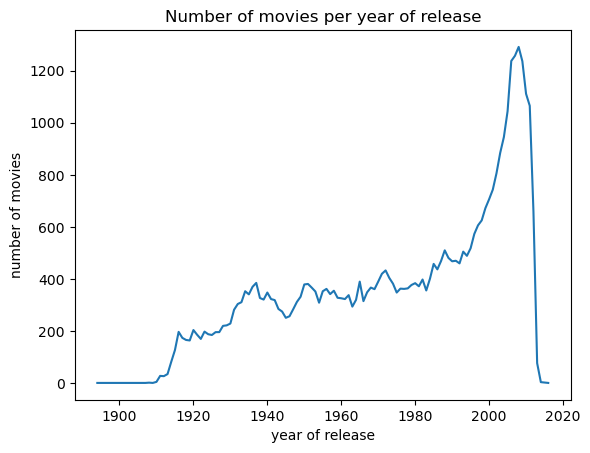

In [79]:
dates.value_counts().sort_index().plot()
plt.title('Number of movies per year of release')
plt.xlabel('year of release')
plt.ylabel('number of movies')
plt.show()

We can see that the number of movies per year is stagnant from 1920 to 1960 and grows rapidly from 1996 on.

We can also see that we seem to be missing many movies from 2012 on, because the number of releases certainly did not slow down. This is due to the declining popularity, and finally discontinuation, of Freebase, where the data of the cmu dataset is from.

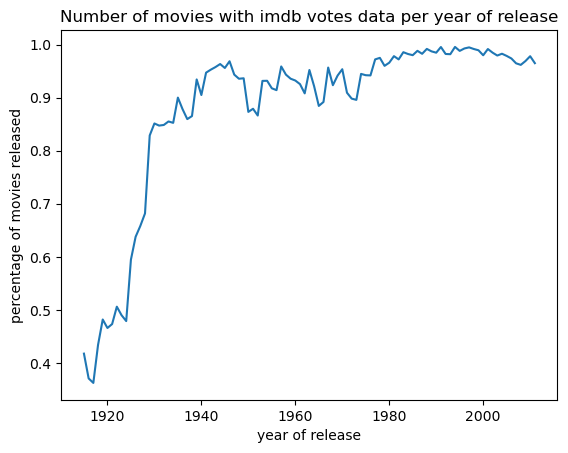

In [80]:
movie_data_ext.dropna(subset=['num_votes']).release_date.value_counts().divide(n_movies_per_year).sort_index().plot()
plt.title('Number of movies with imdb votes data per year of release')
plt.xlabel('year of release')
plt.ylabel('percentage of movies released')
plt.show()

From the graph above, we can see that most movies from 1930 on have voting/rating data in our dataset.

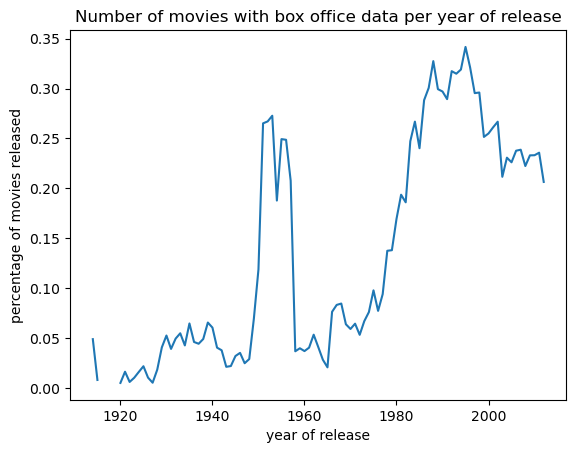

In [81]:
movie_data.dropna(subset=['box_office_revenue']).release_date.apply(lambda d: d.year).value_counts().divide(n_movies_per_year).sort_index().plot()
plt.title('Number of movies with box office data per year of release')
plt.xlabel('year of release')
plt.ylabel('percentage of movies released')
plt.show()

From the graph above, we can see that we have some box office data from 1951 to 1957 as well as from 1980 onward.

From the above analyses, we can see that the time span we can use of our data depends mainly on what metrics we consider.

Nonetheless, it makes sense to, in any case, consider only the years from 1914 to 2011 because before that, there are too few movies in our dataset, and after that we are clearly missing too many of them to allow for meaningful analysis.

Finally, it could also be considered to keep the timespan for which the data has the highest quality, where we would use as quality metric the number of votes on IMDB. This would assume that the more votes a movie has, the more the community is engaged with it and the higher the quality of this crowdsourced data will be.

### 3. Genres data

As we showed in this notebook, we have two different classifications. The one from IMDB using only 28 genres, and the one from CMU using 363 genres.

We also showed that the distribution of the IMDB classification is more consistent; all 28 genres are used in a meaningfull way. In contrast, the CMU classification contains genres used very rarely.

They both have advantages and disatvantages with respect to granularity, quality of classification etc. It hence makes sense, in our opinion, to consider them both but separately.

### 4. Data normalization

It does not make sense to compare genre occurences per year in absolute values since the number of releases per year is not constant, especially if we consider movies before and after 1996.

Hence we consider the percentage of releases for each year.

### 5. Movie choice

There are different approaches possible on which movies to consider, as we already showed in this notebook.

#### Consider all movies

Genre popularity probably has an effect on the entire movie industry, not only block busters. Hence it makes sense to consider all releases. But the issue with this approach is that the results might be influenced by missing data. Indeed, if we are missing a significant percentage of releases for a given year, then the result of our analysis might be wrong. For this reason, we believe that it makes more sense to consider only a subset of releases for each year.

#### Keep only the most popular ones

An other option would be to keep the top n percent movies for each year. Were n would be a value, probably from 10 to 50, chosen depending on factors like timespan and number of releases per year.

The metric for ranking the movies for each year can be any combination of:

- average rating (as a measure of quality)
- box office revenue (as a measure of popularity/quality)
- number of votes (as a measure of popularity)
- relevance score associated to the crew, i.e. actors, directors, writers, etc. (as a measure of relevance)

### 6. Granularity

We need to think about the granularity. Do we want to consider the evolution year after year or do we want to consider timespans, i.e. every 3 years?

We could also envision differentiating between movie industries in a second phase. For example, comparing trends between Holywood, Bolywood, asian productions, european productions, etc.